## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

## Get the data

In [2]:
df = pd.read_csv("../../../datasets/parte2/treino/dataset.csv")
dfWeatherData = pd.read_csv("../../../datasets/parte2/teste/missingWeatherData.csv")
dfRadiation = pd.read_csv("../../../datasets/parte2/treino/radiation.csv")

#### Rename some columns

In [3]:
dfRadiation.rename(columns={'Data': 'date','Hora':'hour'}, inplace=True)

#### Merge datasets

In [4]:
df = pd.merge(df, dfRadiation, on=['date','hour'], how='inner')

## Feature engineering

#### Split date

In [5]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant,shortwave_radiation_sum,year,month,day
0,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
1,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
2,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
3,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
4,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29


#### Remove city_name

In [6]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant,shortwave_radiation_sum,year,month,day
0,1632873600,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
1,1632877200,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
2,1632880800,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
3,1632884400,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29
4,1632888000,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,...,0.0,0.0,0.0,0.0,0.0,0.0,17.84,2021,9,29


#### Remove day, month, year and hour

In [7]:
df['Data'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,direct_normal_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant,shortwave_radiation_sum,month,Data
0,1632873600,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
1,1632877200,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
2,1632880800,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
3,1632884400,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
4,1632888000,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29


#### Remove dt

In [8]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,direct_normal_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant,shortwave_radiation_sum,month,Data
0,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
1,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
2,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
3,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29
4,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.84,9,2021-09-29


## Label enconding

In [9]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [10]:
lb = LabelBinarizer()

lb_results = lb.fit_transform(df['weather_description'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,month,Data,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,...,9,2021-09-29,0,0,0,0,0,1,0,0
1,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,...,9,2021-09-29,0,0,0,0,0,1,0,0
2,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,...,9,2021-09-29,0,0,0,0,0,1,0,0
3,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,...,9,2021-09-29,0,0,0,0,0,1,0,0
4,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,...,9,2021-09-29,0,0,0,0,0,1,0,0


## Missing Values

In [11]:
print(df.isna().sum())
df.shape

temp                                    0
feels_like                              0
temp_min                                0
temp_max                                0
pressure                                0
sea_level                           11016
grnd_level                          11016
humidity                                0
wind_speed                              0
rain_1h                              8732
clouds_all                              0
hour                                    0
normal                                  0
economic_schedule                       0
self-consumption                        0
injection                            7777
shortwave_radiation                     0
direct_radiation                        0
diffuse_radiation                       0
direct_normal_irradiance                0
terrestrial_radiation                   0
shortwave_radiation_instant             0
direct_radiation_instant                0
diffuse_radiation_instant         

(11016, 37)

In [12]:
dfWeatherData.dtypes

temp          float64
humidity      float64
pressure      float64
clouds_all    float64
wind_speed    float64
Data           object
Hora            int64
temp_max      float64
temp_min      float64
dtype: object

In [13]:
dfWeatherData.head()

,temp,humidity,pressure,clouds_all,wind_speed,Data,Hora,temp_max,temp_min
0,7.5795,92.105790,1023.2,0.3,4.693825,2023-03-15,0,19.4795,3.1295
1,6.6295,93.656876,1022.7,2.1,5.860375,2023-03-15,1,19.4795,3.1295
2,5.7795,94.269510,1022.5,2.1,6.638072,2023-03-15,2,19.4795,3.1295
3,5.1295,94.240280,1022.0,5.4,5.411986,2023-03-15,3,19.4795,3.1295
4,4.4795,94.876150,1020.8,0.3,4.024922,2023-03-15,4,19.4795,3.1295


In [14]:
dfWeatherData['Data'] = pd.to_datetime(dfWeatherData['Data'])
dfWeatherData['Hora'] = pd.to_timedelta(dfWeatherData['Hora'], unit='h')
dfWeatherData['DataHora'] = pd.to_datetime(dfWeatherData['Data']) + dfWeatherData['Hora']
dfWeatherData.drop('Hora', axis=1, inplace=True)
dfWeatherData.drop('Data', axis=1, inplace=True)

In [15]:
dfWeatherData.tail()

,temp,humidity,pressure,clouds_all,wind_speed,temp_max,temp_min,DataHora
499,20.079500,34.974290,1015.1,0.0,4.334974,21.9795,5.6295,2023-04-04 19:00:00
500,13.579500,63.051014,1016.1,0.0,8.891344,21.9795,5.6295,2023-04-04 20:00:00
501,12.579500,66.615400,1017.0,2.4,7.993297,21.9795,5.6295,2023-04-04 21:00:00
502,11.679501,67.814880,1017.5,0.9,8.669949,21.9795,5.6295,2023-04-04 22:00:00
503,9.629500,77.460400,1017.9,0.0,8.049845,21.9795,5.6295,2023-04-04 23:00:00


In [16]:
dfWeatherData.dtypes

temp                 float64
humidity             float64
pressure             float64
clouds_all           float64
wind_speed           float64
temp_max             float64
temp_min             float64
DataHora      datetime64[ns]
dtype: object

In [17]:
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_timedelta(df['hour'], unit='h')
df['DataHora'] = pd.to_datetime(df['Data']) + df['Hora']
df.drop('Hora', axis=1, inplace=True)
df.drop('Data', axis=1, inplace=True)

In [18]:
df.tail()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear,DataHora
11011,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,...,12,0,0,0,0,1,0,0,0,2022-12-31 19:00:00
11012,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,...,12,0,0,1,0,0,0,0,0,2022-12-31 20:00:00
11013,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,...,12,0,0,1,0,0,0,0,0,2022-12-31 21:00:00
11014,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,...,12,0,0,0,0,1,0,0,0,2022-12-31 22:00:00
11015,12.93,12.76,12.23,13.43,1019,NaN,NaN,95,1.93,4.07,...,12,0,0,1,0,0,0,0,0,2022-12-31 23:00:00


In [19]:
df.dtypes

temp                                       float64
feels_like                                 float64
temp_min                                   float64
temp_max                                   float64
pressure                                     int64
sea_level                                  float64
grnd_level                                 float64
humidity                                     int64
wind_speed                                 float64
rain_1h                                    float64
clouds_all                                   int64
hour                                         int64
normal                                     float64
economic_schedule                          float64
self-consumption                           float64
injection                                   object
shortwave_radiation                        float64
direct_radiation                           float64
diffuse_radiation                          float64
direct_normal_irradiance       

#### Remove sea_level, grnd_level and rain_1h

In [20]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True)
"""
df['temp'].fillna(df['temp'].mean(), inplace=True)

df['temp_min'].fillna(df['temp_min'].mean(), inplace=True)

df['temp_max'].fillna(df['temp_max'].mean(), inplace=True)

df['pressure'].fillna(df['pressure'].mean(), inplace=True)

df['humidity'].fillna(df['humidity'].mean(), inplace=True)

df['wind_speed'].fillna(df['wind_speed'].mean(), inplace=True)

df['clouds_all'].fillna(df['clouds_all'].mean(), inplace=True)
"""
df.set_index('DataHora', inplace=True)
dfWeatherData.set_index('DataHora', inplace=True)

df.update(dfWeatherData)

df.reset_index(inplace=True)

df.drop('DataHora', axis=1, inplace=True)

print(df.isna().sum())
df.shape

temp                                   0
feels_like                             0
temp_min                               0
temp_max                               0
pressure                               0
humidity                               0
wind_speed                             0
clouds_all                             0
hour                                   0
normal                                 0
economic_schedule                      0
self-consumption                       0
injection                           7777
shortwave_radiation                    0
direct_radiation                       0
diffuse_radiation                      0
direct_normal_irradiance               0
terrestrial_radiation                  0
shortwave_radiation_instant            0
direct_radiation_instant               0
diffuse_radiation_instant              0
direct_normal_irradiance_instant       0
terrestrial_radiation_instant          0
shortwave_radiation_sum                0
month           

(11016, 33)

#### Types Visualization

In [21]:
df.dtypes

temp                                float64
feels_like                          float64
temp_min                            float64
temp_max                            float64
pressure                              int64
humidity                              int64
wind_speed                          float64
clouds_all                            int64
hour                                  int64
normal                              float64
economic_schedule                   float64
self-consumption                    float64
injection                            object
shortwave_radiation                 float64
direct_radiation                    float64
diffuse_radiation                   float64
direct_normal_irradiance            float64
terrestrial_radiation               float64
shortwave_radiation_instant         float64
direct_radiation_instant            float64
diffuse_radiation_instant           float64
direct_normal_irradiance_instant    float64
terrestrial_radiation_instant   

#### Data normalization

In [22]:
df['temp'] = (df['temp'] - df['temp'].min()) / (df['temp'].max() - df['temp'].min())

df['feels_like'] = (df['feels_like'] - df['feels_like'].min()) / (df['feels_like'].max() - df['feels_like'].min())

df['temp_min'] = (df['temp_min'] - df['temp_min'].min()) / (df['temp_min'].max() - df['temp_min'].min())

df['temp_max'] = (df['temp_max'] - df['temp_max'].min()) / (df['temp_max'].max() - df['temp_max'].min())

df['pressure'] = (df['pressure'] - df['pressure'].min()) / (df['pressure'].max() - df['pressure'].min())

df['humidity'] = (df['humidity'] - df['humidity'].min()) / (df['humidity'].max() - df['humidity'].min())

df['wind_speed'] = (df['wind_speed'] - df['wind_speed'].min()) / (df['wind_speed'].max() - df['wind_speed'].min())

df['clouds_all'] = (df['clouds_all'] - df['clouds_all'].min()) / (df['clouds_all'].max() - df['clouds_all'].min())

df['hour'] = (df['hour'] - df['hour'].min()) / (df['hour'].max() - df['hour'].min())

df['normal'] = (df['normal'] - df['normal'].min()) / (df['normal'].max() - df['normal'].min())

df['economic_schedule'] = (df['economic_schedule'] - df['economic_schedule'].min()) / (df['economic_schedule'].max() - df['economic_schedule'].min())

df['self-consumption'] = (df['self-consumption'] - df['self-consumption'].min()) / (df['self-consumption'].max() - df['self-consumption'].min())

df['month'] = (df['month'] - df['month'].min()) / (df['month'].max() - df['month'].min())

df['broken clouds'] = (df['broken clouds'] - df['broken clouds'].min()) / (df['broken clouds'].max() - df['broken clouds'].min())

df['few clouds'] = (df['few clouds'] - df['few clouds'].min()) / (df['few clouds'].max() - df['few clouds'].min())

df['heavy intensity rain'] = (df['heavy intensity rain'] - df['heavy intensity rain'].min()) / (df['heavy intensity rain'].max() - df['heavy intensity rain'].min())

df['light rain'] = (df['light rain'] - df['light rain'].min()) / (df['light rain'].max() - df['light rain'].min())

df['moderate rain'] = (df['moderate rain'] - df['moderate rain'].min()) / (df['moderate rain'].max() - df['moderate rain'].min())

df['overcast clouds'] = (df['overcast clouds'] - df['overcast clouds'].min()) / (df['overcast clouds'].max() - df['overcast clouds'].min())

df['scattered clouds'] = (df['scattered clouds'] - df['scattered clouds'].min()) / (df['scattered clouds'].max() - df['scattered clouds'].min())

df['sky is clear'] = (df['sky is clear'] - df['sky is clear'].min()) / (df['sky is clear'].max() - df['sky is clear'].min())

df['shortwave_radiation_sum'] = (df['shortwave_radiation_sum'] - df['shortwave_radiation_sum'].min()) / (df['shortwave_radiation_sum'].max() - df['shortwave_radiation_sum'].min())


In [23]:
df['injection'] = df['injection'].fillna("None")


In [24]:
df.isna().sum()

temp                                0
feels_like                          0
temp_min                            0
temp_max                            0
pressure                            0
humidity                            0
wind_speed                          0
clouds_all                          0
hour                                0
normal                              0
economic_schedule                   0
self-consumption                    0
injection                           0
shortwave_radiation                 0
direct_radiation                    0
diffuse_radiation                   0
direct_normal_irradiance            0
terrestrial_radiation               0
shortwave_radiation_instant         0
direct_radiation_instant            0
diffuse_radiation_instant           0
direct_normal_irradiance_instant    0
terrestrial_radiation_instant       0
shortwave_radiation_sum             0
month                               0
broken clouds                       0
few clouds  

## Write new csv

In [25]:
df.to_csv('../../../datasets/parte2/treino/dataset_prepared.csv', index=False)

<Axes: >

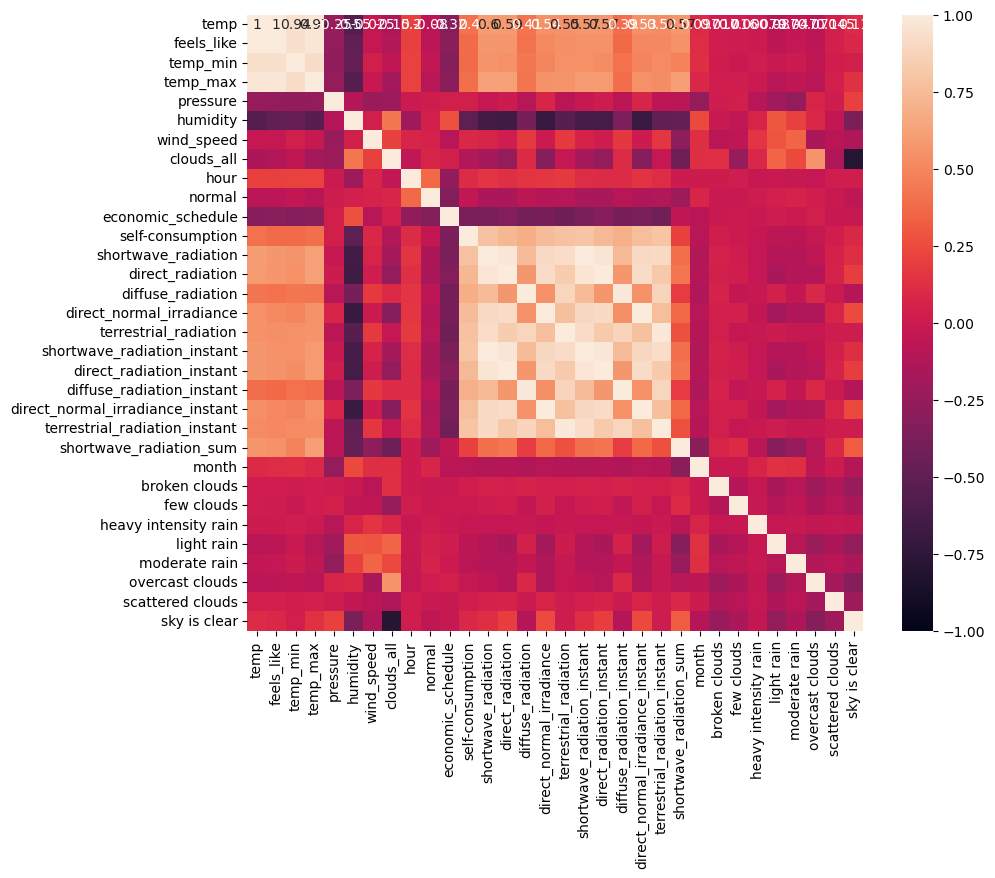

In [26]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)